In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pokemon = pd.read_csv('/content/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Dropped the column "#" as it was adding no information

In [ ]:
pokemon.drop('#',axis='columns',inplace=True)

In [62]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
nan_count = pokemon['Type 2'].isna().sum()
total_count = pokemon['Type 2'].shape[0]
nan_percentage = (nan_count / total_count) * 100
nan_percentage

48.25

### 48.25%(386 out of 800) of the pokemon in the dataset are of only one type.

In [ ]:
pokemon['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

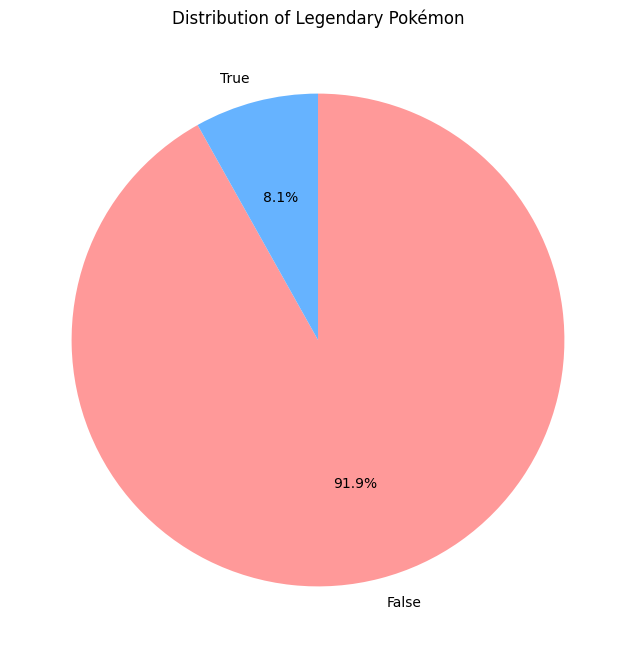

In [ ]:
legendary_counts = pokemon['Legendary'].value_counts()
plt.figure(figsize=(8, 8))
legendary_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Legendary Pokémon')
plt.ylabel('')
plt.show()

## Insight: There are 65 legendary pokemon in the dataset

In [ ]:
pokemon['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

### There are total of 6 generations of pokemon.


### Top 5 Pokemon with maximum HP

In [ ]:
pokemon.nlargest(5,'HP')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


### Top 5 pokemons with highest HP are
- Blissey
- Chansey
- Wobbuffett
- Wailord
- Alomomola

### Top 5 pokemons with maximum Attack

In [ ]:
pokemon.nlargest(5,'Attack')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


### Top 5 pokemons with maximum Attack are
- MewtwoMega Mewtwo X
- HeracrossMega Heracross
- GroudonPrimal Groudon
- RayquazaMega Rayquaza
- DeoxysAttack Forme
### Also out the top 5, HeracrossMega Heracross is only the non-legendary pokemon

### Top 5 pokemon with highest Defense

In [ ]:
pokemon.nlargest(5,'Defense')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


### Top 5 pokemons with maximum Attack are
- SteelixMega Steelix
- Shuckle
- AggronMega Aggron
- Steelix
- Regirock
### Also out the top 5, Regirock is only the legendary pokemon

### Top 20 pokemon according to their stats

In [ ]:
pokemon.nlargest(20,'Total')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
418,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True


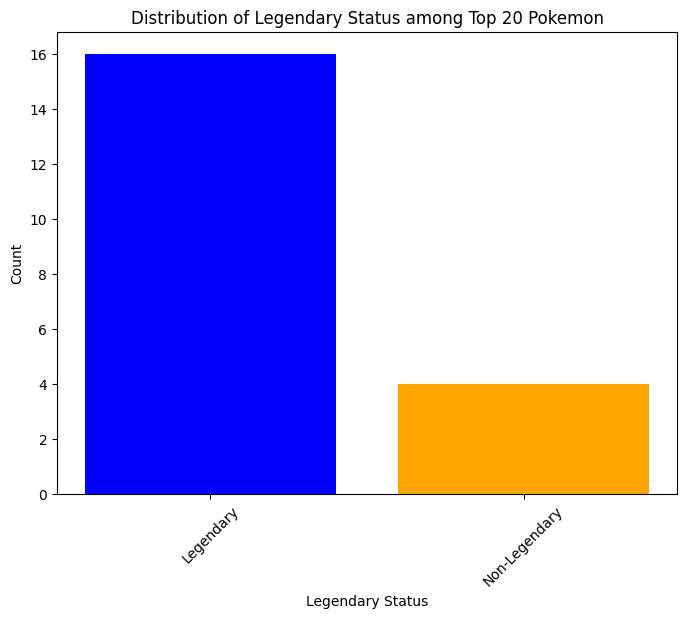

In [ ]:
top_20_pokemon = pokemon.nlargest(20, 'Total')
legendary_counts = top_20_pokemon['Legendary'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(legendary_counts.index.map({True: 'Legendary', False: 'Non-Legendary'}), legendary_counts.values, color=['blue', 'orange'])
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Distribution of Legendary Status among Top 20 Pokemon')
plt.xticks(rotation=45)
plt.show()

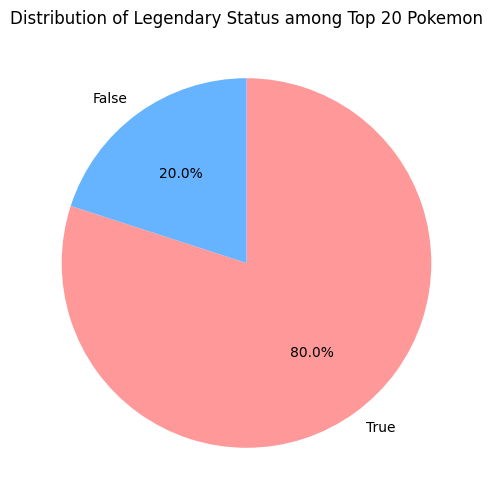

In [ ]:
plt.figure(figsize=(8, 6))
legendary_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Legendary Status among Top 20 Pokemon')
plt.ylabel('')
plt.show()

### 80% of the top 20 pokemon are legendary

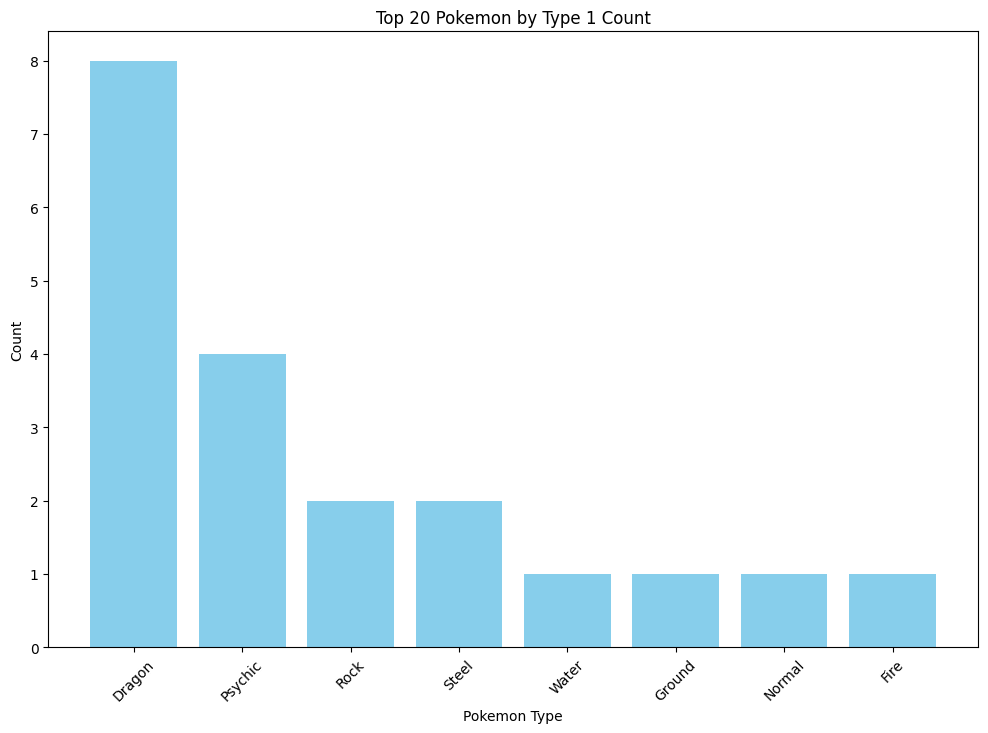

In [ ]:
op_20_pokemon = pokemon.nlargest(20, 'Total')
type_counts = top_20_pokemon['Type 1'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(type_counts.index, type_counts.values, color='skyblue')
plt.xlabel('Pokemon Type')
plt.ylabel('Count')
plt.title('Top 20 Pokemon by Type 1 Count')
plt.xticks(rotation=45)
plt.show()

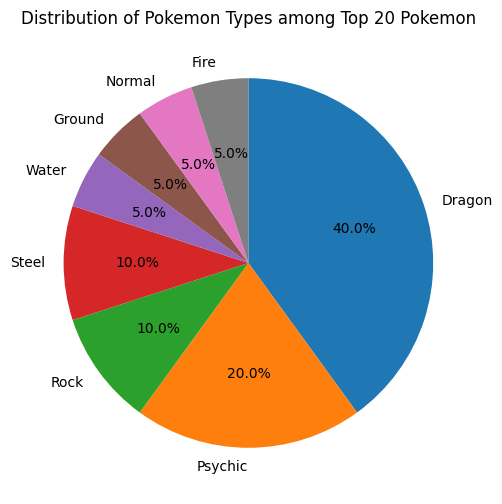

In [ ]:
plt.figure(figsize=(8, 6))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Pokemon Types among Top 20 Pokemon')
plt.ylabel('')
plt.show()

### Drogon type contributes 40% among top 20 followed by Psychic, 10%

### Bar Chart of Pokemon Type 1 with Average Total Stats

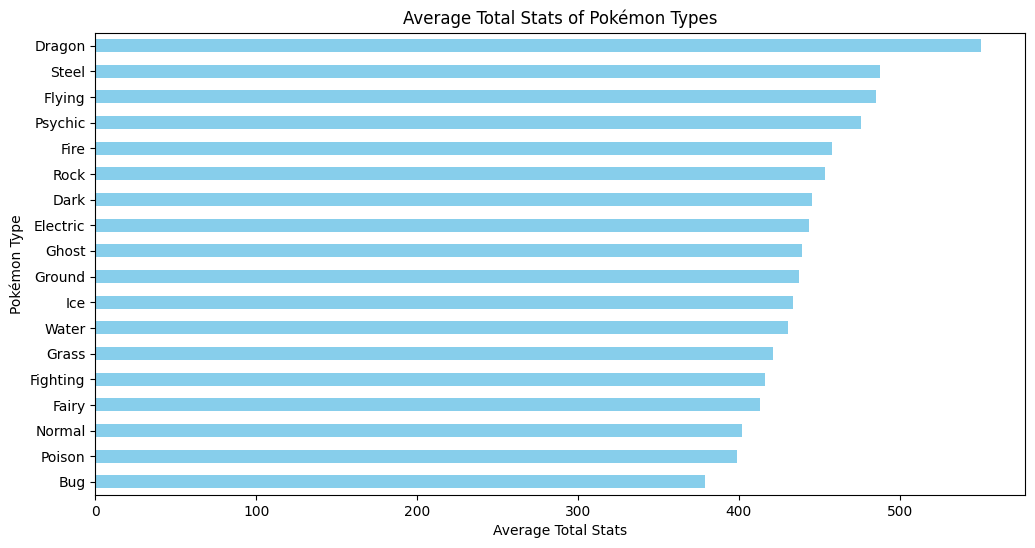

In [ ]:
average_stats = pokemon.groupby('Type 1')['Total'].mean()

plt.figure(figsize=(12, 6))
average_stats.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Total Stats')
plt.ylabel('Pokémon Type')
plt.title('Average Total Stats of Pokémon Types')
plt.show()

### Realtionship betweem Attack vs. Defense stats of Pokemon

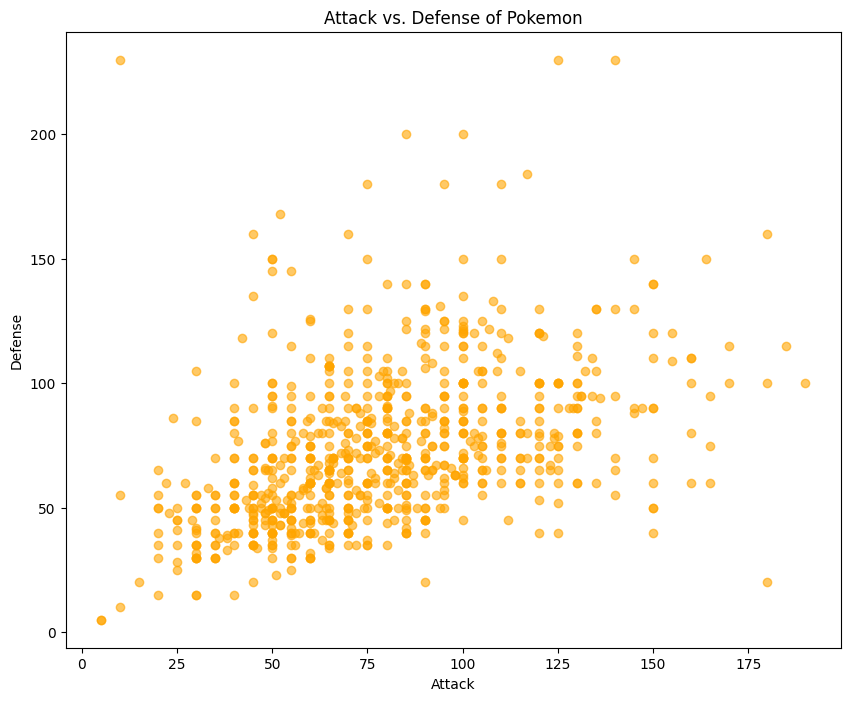

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(pokemon['Attack'], pokemon['Defense'], color='orange', alpha=0.6)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs. Defense of Pokemon')
plt.show()

### Box Plot of total stats by Pokemon Type 1

<ipython-input-56-60d939c46f56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type 1', y='Total', data=pokemon, palette='Set3')


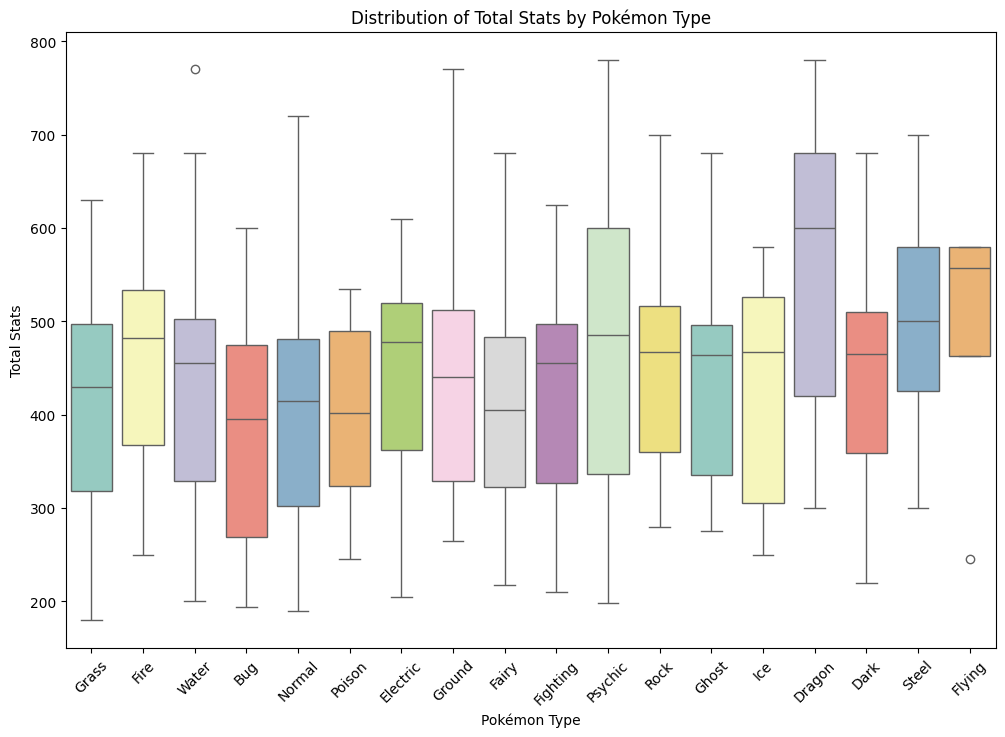

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type 1', y='Total', data=pokemon, palette='Set3')
plt.xlabel('Pokémon Type')
plt.ylabel('Total Stats')
plt.title('Distribution of Total Stats by Pokémon Type')
plt.xticks(rotation=45)
plt.show()

### Count of Pokemon Generation

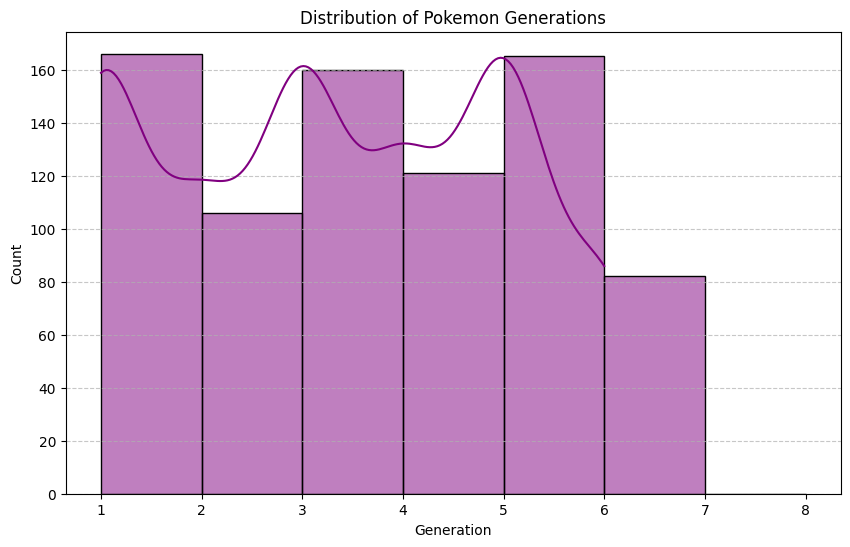

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(pokemon['Generation'], bins=range(1, 9), color='purple', edgecolor='black', kde=True)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Distribution of Pokemon Generations')
plt.xticks(range(1, 9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Correlation Analysis

In [ ]:
numeric_attributes = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

correlation_matrix = pokemon[numeric_attributes].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


<Axes: >

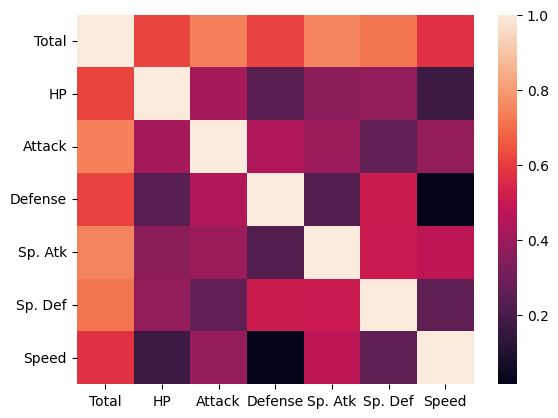

In [ ]:
sns.heatmap(correlation_matrix)